First 5 rows of dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

<ipython-input-7-a46fce98c235>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)
<ipython-input-7-a46fce98c235>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset['Dependents'].replace('3+', 4, inplace=True)
<ipython-i

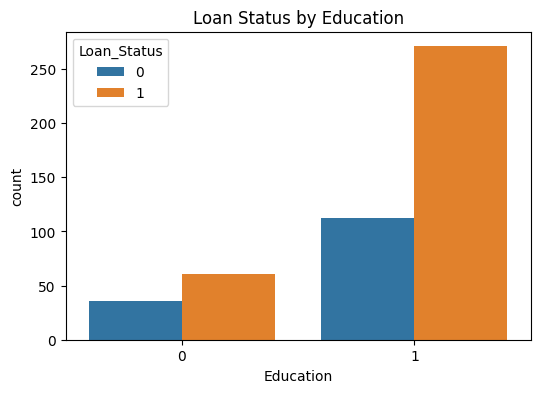

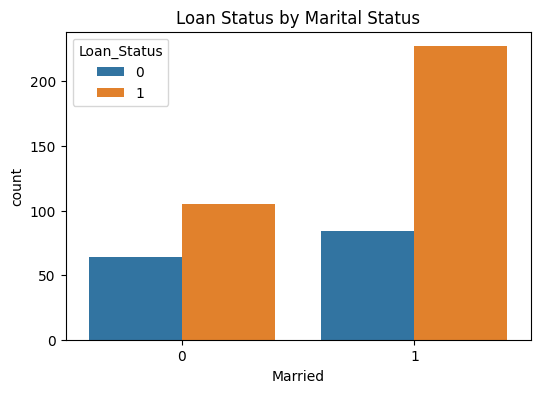

Accuracy on training data: 0.7986111111111112
Accuracy on test data: 0.8333333333333334

Prediction Result:
Loan Approved ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [7]:
# Loan Status Prediction using Support Vector Machine

# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
loan_dataset = pd.read_csv('/content/dataset.csv')

# Display basic info
print("First 5 rows of dataset:")
print(loan_dataset.head())

print("\nDataset shape:", loan_dataset.shape)

# Checking for missing values
print("\nMissing values per column:")
print(loan_dataset.isnull().sum())

# Drop rows with missing values
loan_dataset.dropna(inplace=True)

print("\nMissing values after dropping:")
print(loan_dataset.isnull().sum())

# Label Encoding
loan_dataset.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)

# Replace '3+' in Dependents with 4
loan_dataset['Dependents'].replace('3+', 4, inplace=True)

# Convert categorical columns to numerical
loan_dataset.replace({
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)

# Data Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)
plt.title("Loan Status by Education")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)
plt.title("Loan Status by Marital Status")
plt.show()

# Separating features and labels
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

# Model Training using Support Vector Machine
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data:", training_data_accuracy)

# Accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data:", test_data_accuracy)

# Making a Predictive System
# Example input (in correct format)
input_data = (1, 1, 0, 0, 1, 5000, 2000, 150, 360, 1, 1)  # Sample input

# Convert to numpy array
input_data_as_array = np.asarray(input_data)

# Reshape for prediction
input_data_reshaped = input_data_as_array.reshape(1, -1)

# Predict
prediction = classifier.predict(input_data_reshaped)

print("\nPrediction Result:")
if prediction[0] == 1:
    print("Loan Approved ✅")
else:
    print("Loan Not Approved ❌")
